# In Class Activity - Spotify Database - SQL Practice

Instructor: Melissa Laurino</br>
Spring 2025</br>

Name: Jordan Davis 
</br>
Date: 2/27/25
<br>
<br>

In [3]:
# Load necessary packages:
from sqlalchemy import create_engine, inspect, text # Database navigation
import sqlite3 # A second option for working with databases
import pandas as pd # Python data manilpulation

In [ ]:
# Print the columns in the database:

In [5]:
# Create a SQLite database and engine
db_file = "spotify_data.db"
engine = create_engine(f"sqlite:///{db_file}")

In [7]:
# Inspect the database to list the fields
inspector = inspect(engine)
columns = inspector.get_columns("spotify_history")

# Print column names
print("Columns in spotify_history table:")
for col in columns:
    print(col["name"], "-", col["type"])

Columns in spotify_history table:
ts - TEXT
platform - TEXT
ms_played - BIGINT
conn_country - TEXT
ip_addr - TEXT
master_metadata_track_name - TEXT
master_metadata_album_artist_name - TEXT
master_metadata_album_album_name - TEXT
spotify_track_uri - TEXT
episode_name - FLOAT
episode_show_name - FLOAT
spotify_episode_uri - FLOAT
audiobook_title - FLOAT
audiobook_uri - FLOAT
audiobook_chapter_uri - FLOAT
audiobook_chapter_title - FLOAT
reason_start - TEXT
reason_end - TEXT
shuffle - BOOLEAN
skipped - BOOLEAN
offline - BOOLEAN
offline_timestamp - FLOAT
incognito_mode - BOOLEAN
year - BIGINT


In [9]:
# Notice that we are not specifiying a host, password, or server since this .db file is stored locally.
# Setting the database path 
db_path = r"C:\Users\jorda\Documents\Data_Gathering\Assignment5\spotify_data.db"   
# Creating the database engine
engine = create_engine(f"sqlite:///{db_path}")

For practice, there are not multiple tables in this database. There is only one table named spotify_history.

Metadata for this database can be found here: https://github.com/MelissaLaurino/SpotifyStreamingHistory

We can use COUNT( * ) to summarize and count occurrences in SQL. Use COUNT( * ) below:

Query 1: <br>
Find the top 30 artists listened to in the year 2024.

In [11]:
with engine.connect() as connection:  # Establish a connection
    query = text("""
                SELECT master_metadata_album_artist_name, COUNT(*) AS top30
                FROM spotify_history
                WHERE year = 2024
                GROUP BY master_metadata_album_artist_name 
                ORDER BY count(*) DESC
                LIMIT 30;
                """)                      # Count top 30 most played artists in 2024, group by artist name and sort by play count
    practice = pd.read_sql(query, connection) # Use pandas to read the sql query with the connection to the database

# Printing the results 
practice

,master_metadata_album_artist_name,top30
0,Miley Cyrus,680
1,Ariana Grande,583
2,Hozier,512
3,Eminem,454
4,Sabrina Carpenter,444
5,Lady Gaga,326
6,Billie Eilish,284
7,Noah Cyrus,282
8,Amy Winehouse,266
9,Teddy Swims,257


Query 2: <br>
Find the top 30 songs listened to in the year 2017.

In [13]:
# select master_metadata_track_name where year = 2017 limit to 30
with engine.connect() as connection:  # Establish a connection
    query = text("""SELECT master_metadata_track_name, COUNT(*) AS song
                    FROM spotify_history 
                    WHERE year = 2017
                    GROUP BY master_metadata_track_name
                    ORDER BY song DESC
                    LIMIT 30
                    """)                      # Get top 30 tracks of 2017 by play count
    top_30_songs = pd.read_sql(query, connection) # Use pandas to read the sql query with the connection to the database
    
# Print the results
top_30_songs

,master_metadata_track_name,song
0,Malibu,223
1,Close,150
2,Shape of You,147
3,It Ain’t Me (with Selena Gomez),117
4,Take Me Down,95
5,Rainbow,95
6,Havana (feat. Young Thug),95
7,Week Without You,88
8,Anyway,86
9,Love Someone,82


Query 3: <br>
Ask a question and create your own! 

In [81]:
# What were the top ten artists listened to in 2023
with engine.connect() as connection:
    query = text("""
                SELECT master_metadata_album_artist_name, COUNT(*) AS play_count
                FROM spotify_history
                WHERE year = 2023
                GROUP BY master_metadata_album_artist_name
                ORDER BY COUNT(*) DESC
                LIMIT 10;
                """) 
                            # selecting the album artist name as play count from spotify history where the year is 2023. Grouping by this and order 
                            # them all by decending ordering for the top ten.
    top_artists = pd.read_sql(query, connection) # Use pandas to read the sql query with the connection to the database

# Displaying the results
top_artists

,master_metadata_album_artist_name,play_count
0,Miley Cyrus,1438
1,Noah Cyrus,520
2,Hozier,469
3,Eminem,308
4,Blackberry Smoke,267
5,Sia,251
6,Lana Del Rey,249
7,Adele,221
8,Taylor Swift,209
9,Chris Stapleton,199


In [15]:
#Disconnect from the database. Always remember to disconnect :) 
# Disconnecting
engine.dispose()
# Making sure 
print("Disconnected from the database.")

Disconnected from the database.


# Assignment #5 - Data Gathering and Warehousing - DSSA-5102

<b>Only Murders in the...Database?</b><br>
An introduction to navigating SQL databases using R and Jupyter Notebook. <br>
<br>
Congrats! You have solved the murder from Assignment #4, let's practice more queries in SQL City! <br>
<br>
Your task for <b>Assignment #5</b> is to complete the following objectives:<br>
You are a data scientist that was hired by SQL City. Your objectives are as follows:<br>
- Objective 1: The town is willing to fund more training for officers in SQL City based on the type of crime that is most committed. The training would help them identify the clues that indicate these two types upon arrival on a crime scene. As a data scientist, what crime type would you advise needs more training for officers in SQL city? What crime was committed the most in SQL City within the database date range? Save your query as a dataframe and quickly add a ggplot2 bar graph visual to support your recommendation.<br>
- Objective 2: The town has also received more funding to encourage DOUBLE overtime for officers in SQL City during the month with the highest crime rate through out the date range of the database. What month would you advise the town to encourage officer overtime? <br>
- Objective 3: To thank the officers for their extra training and overtime, the town will pay for their monthly gym membership. They want to give the officers the membership that the least amount of civilians have to avoid being recognized daily as the town heros. The membership can be used in any town. What membership does the town give them?<br><br>
<b>--</b>Add detailed comments to explain EVERY query or SQL command you use while we are still learning and practicing. I have my steps outlined, but please add more cells inbetween for additional queries! There is no limit on the number of queries you can use. <br>
<b>--</b>For each query include comments such as "SELECT all records FROM table WHERE column name = X"<br>
<b>--</b>Answer the prompts in markdown cells. Justify your response. A simple yes/no answer will receive no credit.<br>

Recommended Readings: Chapters 4-7 in Getting Started with SQL by Thomas Nield<br><br>

SQL Dictionary: https://www.w3schools.com/sql/sql_ref_join.asp

This fabulous database was created by @NUKnightLab on Github and can be found here: https://github.com/NUKnightLab/sql-mysteries


In [3]:
# Load necessary libraries
from sqlalchemy import create_engine, inspect, text # Database navigation
import sqlite3 # A second option for working with databases
import pandas as pd # Python data manilpulation
import matplotlib.pyplot as plt  # Import matplotlib for plotting

In [5]:
# Connect to our .db file
db_file = "sql-murder-mystery.db"  

# Create an SQLite database connection
engine = create_engine(f"sqlite:///{db_file}")

In [7]:
# Define the SQL query to list all tables in the database
query = text("""
    SELECT name  
    FROM sqlite_master  
    WHERE type='table';  
""") # selecting the name column from sqlite_master and filtering to retrieve only table names

# Executing the query and putting the results into a data frame
with engine.connect() as connection:  # Opening a connection to the database
    tables = pd.read_sql(query, connection)  # Executing the SQL query and store the results in a data frame 
# Printing table names
tables

,name
0,crime_scene_report
1,drivers_license
2,person
3,facebook_event_checkin
4,interview
5,get_fit_now_member
6,get_fit_now_check_in
7,income
8,solution


In [9]:
# Defining the table name 
table_name = "crime_scene_report"  

# Define the SQL query to list only column names in the specified table
query = text(f"""
    SELECT name FROM PRAGMA_table_info('{table_name}');  
""") # retrieving only the column names from the table 

# Executing the query and putting the results into a data frame 
with engine.connect() as connection:  # Opening a connection to the database
    column_crime = pd.read_sql(query, connection)  # Executing the SQL query and storing the results in a data frame 
# Printing the column name for the crime_scene_report table
column_crime 

,name
0,date
1,type
2,description
3,city


In [11]:
# Defining the table name 
table_name = "drivers_license"  

# Defining the SQL query to list only column names in the specified table
query = text(f"""
    SELECT name FROM PRAGMA_table_info('{table_name}');  
""") # retrieving only the column names

# Executing the query and putting the results into a data frame 
with engine.connect() as connection:  # Opening a connection to the database
    column_driver = pd.read_sql(query, connection)  # Executing the SQL query and storing the results into a data frame 
# Printing the column name for the drivers_license table
column_driver

,name
0,id
1,age
2,height
3,eye_color
4,hair_color
5,gender
6,plate_number
7,car_make
8,car_model


In [13]:
# Defining the table name 
table_name = "person"  

# Defining the SQL query to list only column names in the specified table
query = text(f"""
    SELECT name FROM PRAGMA_table_info('{table_name}');  
""") # Retrieving only the column names 

# Executing the query and putting the results into a data frame 
with engine.connect() as connection:  # Opening a connection to the database
    person = pd.read_sql(query, connection)  # Executing the SQL query and storing the results into a data frame 
# Printing the column name for the person table
person

,name
0,id
1,name
2,license_id
3,address_number
4,address_street_name
5,ssn


In [15]:
# Defining the table name 
table_name = "facebook_event_checkin"  

# Defining the SQL query to list only column names in the specified table
query = text(f"""
    SELECT name FROM PRAGMA_table_info('{table_name}');  
""") # Retrieving only the column names 

# Executing the query and putting the results into a data frame 
with engine.connect() as connection:  # Opening a connection to the database
    facebook_event_checkin = pd.read_sql(query, connection)  # Executing the SQL query and storing the results in a data frame
# Printing the column name for the facebook_event_checkin table
facebook_event_checkin

,name
0,person_id
1,event_id
2,event_name
3,date


In [17]:
# Defining the table name 
table_name = "interview"  

# Defining the SQL query to list only column names in the specified table
query = text(f"""
    SELECT name FROM PRAGMA_table_info('{table_name}');  
""") # Retrieving only the column names

# Executing the query and putting the results into a data frame 
with engine.connect() as connection:  # Opening a connection to the database
    interview = pd.read_sql(query, connection)  # Executing the SQL query and storing the results in a data frame 
# Printing the column name for the interview table
interview

,name
0,person_id
1,transcript


In [19]:
# Defining the table name 
table_name = "get_fit_now_member"  

# Defining the SQL query to list only column names in the specified table
query = text(f"""
    SELECT name FROM PRAGMA_table_info('{table_name}');  
""") # Retrieving only the column names 

# Executing the query and putting the results into a data frame 
with engine.connect() as connection:  # Opening a connection to the database
    get_fit_now_member = pd.read_sql(query, connection)  # Executing the SQL query and storing the results in a data frame
# Printing the column name for the get_fit_now_member table
get_fit_now_member

,name
0,id
1,person_id
2,name
3,membership_start_date
4,membership_status


In [21]:
# Defining the table name 
table_name = "get_fit_now_check_in"  

# Defining the SQL query to list only column names in the specified table
query = text(f"""
    SELECT name FROM PRAGMA_table_info('{table_name}');  
""") # Retrieving only the column names 

# Executing the query and putting the results into a data frame 
with engine.connect() as connection:  # Opening a connection to the database
    get_fit_now_check_in = pd.read_sql(query, connection)  # Executing the SQL query and storing the results into a data frame
# Printing the column name for the get_fit_now_check_in table
get_fit_now_check_in

,name
0,membership_id
1,check_in_date
2,check_in_time
3,check_out_time


In [23]:
# Define the table name 
table_name = "income"  

# Define the SQL query to list only column names in the specified table
query = text(f"""
    SELECT name FROM PRAGMA_table_info('{table_name}');  
""") # Retrieving only the column names

# Executing the query and putting the results into a data frame 
with engine.connect() as connection:  # Opening a connection to the database
    income = pd.read_sql(query, connection)  # Executing the SQL query and storing the results into a data frame 
# Printing the column name for the income table
income

,name
0,ssn
1,annual_income


In [25]:
# Defining the table name 
table_name = "solution"  

# Defining the SQL query to list only column names in the specified table
query = text(f"""
    SELECT name FROM PRAGMA_table_info('{table_name}');  
""") # retrieving only the column names

# Executing the query and putting the results into a data frame 
with engine.connect() as connection:  # Opening a connection to the database
    solution = pd.read_sql(query, connection)  # Executing the SQL query and storing the results into a data frame 
# Printing the column name for the solution table
solution

,name
0,user
1,value


We can use the COUNT command to explore our queries further. COUNT will count the number of records that meet the specified criteria.
Additional examples using COUNT: https://www.w3schools.com/sql/sql_count.asp

In [61]:
#Practice analyzing COUNTS in data tables with SQL queries:
#Brainstorming for Objective 1
#We can find the top ten cities within our Murder Mystery database that had the most crimes by using the COUNT SQL command.
#SELECT the cities that have the most counts within the table crime_scene_report and
#GROUP the results BY city and ORDER BY a DESC count, only show a limit of 10 records:
#practice_cities <- dbSendQuery(db, "SELECT city, COUNT(*) as count
#                            From crime_scene_report
#                            GROUP BY city
#                            ORDER BY count DESC
#                            LIMIT 10")
#dbFetch(practice_cities)

#Looks like SQL City and Murfeesboro have the highest number of crimes! 

#Use COUNT(*) as count to determine the answers to the objectives below. 

In [27]:
# Defining the SQL query to get the top 10 cities with the most crime reports
query = text("""
    SELECT city, COUNT(*) AS count  -- Select city and count the number of crime reports for each city
    FROM crime_scene_report  -- Retrieve data from the crime_scene_report table
    GROUP BY city  -- Group results by city to count occurrences
    ORDER BY count DESC  -- Order results in descending order based on the number of crimes
    LIMIT 10;  -- Limit the output to the top 10 cities with the most crime reports
""")

# Executing the query and putting the results into a data frame
with engine.connect() as connection:  # Opening a connection to the database
    top_10_cities = pd.read_sql(query, connection)  # Executing the SQL query and storing the results into a data frame
# Printing the results
top_10_cities

,city,count
0,SQL City,9
1,Murfreesboro,9
2,Toledo,8
3,Jersey City,8
4,Evansville,8
5,Duluth,8
6,Wilmington,7
7,Waterbury,7
8,Reno,7
9,Portsmouth,7


<b>Objective 1:</b> The town is willing to fund more training for officers in SQL City based on the type of crime that is most committed. The training would help them identify the clues that indicate these two types upon arrival on a crime scene. As a data scientist, what crime type would you advise needs more training for officers in SQL city? What crime was committed the most in SQL City within the database date range? Save your query as a dataframe and quickly add a bar graph visual to support your recommendation.

In [29]:
# Defining the SQL query to find the most committed crimes in SQL City
query = text("""
    SELECT type, COUNT(*) AS count  -- Select crime type (from 'type' column) and count occurrences
    FROM crime_scene_report  -- Retrieve data from the crime_scene_report table
    WHERE city = 'SQL City'  -- Filter for crimes that happened in SQL City
    GROUP BY type  -- Group results by crime type to count occurrences
    ORDER BY count DESC;  -- Order results in descending order
""")

# Executing the query and putting the results into a data frame 
with engine.connect() as connection:  # Opening a connection to the database
    crime_counts = pd.read_sql(query, connection)  # Executing the SQL query and storing the results into a data frame
# Printing the crime_counts
crime_counts

,type,count
0,murder,3
1,assault,2
2,theft,1
3,robbery,1
4,bribery,1
5,arson,1


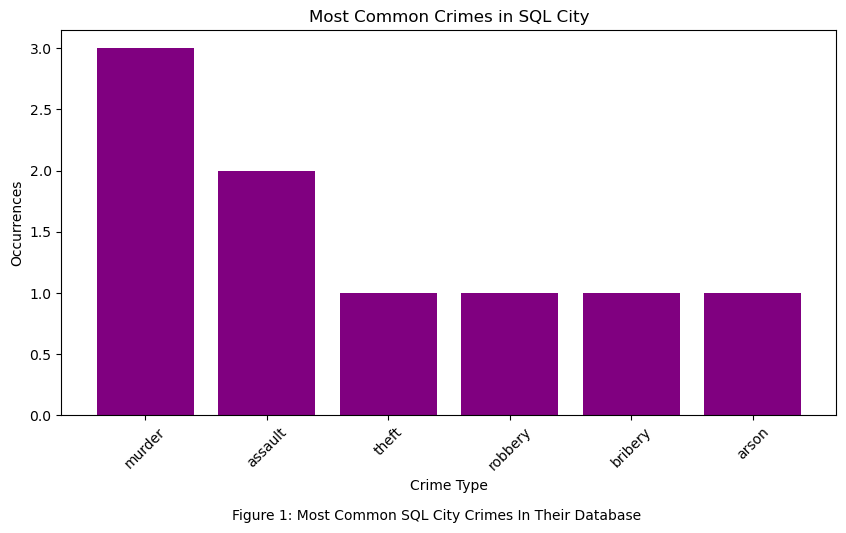

In [33]:
# Graphing
plt.figure(figsize=(10, 5))  # Setting the figure size
plt.bar(crime_counts['type'], crime_counts['count'], color='purple')  # Setting bar color to purple
plt.xlabel('Crime Type')  # Labeling x-axis
plt.ylabel('Occurrences')  # Labeling y-axis
plt.title('Most Common Crimes in SQL City')  # Setting the title
plt.xticks(rotation=45)  # Rotating x-axis labels for readability
plt.figtext(0.5, -0.1, 'Figure 1: Most Common SQL City Crimes In Their Database', ha='center', fontsize=10)  # Adding caption
plt.show()  # Displaying the bar graph


Answer: Murder was the crime committed most.  

<b>Objective 2:</b> The town has also received more funding to encourage DOUBLE overtime for officers in SQL City during the month with the highest crime rate through out the date range of the database. What month would you advise the town to encourage officer overtime?

In [35]:
# Getting the date format
# Getting the top crime report dates in SQL City
with engine.connect() as connection:  # Opening a connection to the database
    query = text("""
        SELECT date, COUNT(*) AS count  -- Select the date and count occurrences
        FROM crime_scene_report  -- Retrieve data from the crime_scene_report table
        WHERE city = 'SQL City'  -- Filter for crimes that happened in SQL City
        GROUP BY date  -- Group results by date to count occurrences
        ORDER BY count DESC  -- Order results in descending order
        LIMIT 10  -- Limit to the top 10 dates with the most crimes
    """)  
    top_date = pd.read_sql(query, connection)  # Executing the SQL query and storing the results into a data frame
    
# Printing the results
top_date

,date,count
0,20180115,3
1,20180215,2
2,20180103,1
3,20171110,1
4,20170820,1
5,20170712,1


It is year, month, day.

In [37]:
# Getting the number of crimes per month in SQL City
with engine.connect() as connection:  # Opening a connection to the database
    query = text("""
        SELECT substr(date, 5, 2) AS month, COUNT(*) AS count  -- Extracting the 2-digit month from the date column and count occurrences
        FROM crime_scene_report  -- Retrieve data from the crime_scene_report table
        WHERE city = 'SQL City'  -- Filter for crimes that happened in SQL City
        GROUP BY month  -- Group results by month to count occurrences
        ORDER BY count DESC  -- Order results in descending order
        LIMIT 12  -- Limit to the top 12 months with the most crimes 
    """)  
    top_month = pd.read_sql(query, connection)  # Executing the SQL query and storing the results into a DataFrame
    
# Printing the results
top_month

,month,count
0,01,4
1,02,2
2,11,1
3,08,1
4,07,1


January is the top month for crime in SQL city.

<b>Objective 3:</b> To thank the officers for their extra training and overtime, the town will pay for their monthly gym membership. They want to give the officers the membership that the least amount of civilians have to avoid being recognized daily as the town heros. The membership can be used in any town. What membership does the town give them?

In [39]:
# Defining the SQL query to find the least used gym membership
query = text("""
    SELECT membership_status, COUNT(*) AS member_count  -- Select membership type and count occurrences
    FROM get_fit_now_member  -- Retrieve data from the get_fit_now_member table
    GROUP BY membership_status  -- Group results by membership type
    ORDER BY member_count ASC  -- Order results in ascending order to find the least used membership
    LIMIT 1;  -- Retrieve only the membership with the lowest count
""")

# Executing the query and putting the results into a data frame
with engine.connect() as connection:  
    least_used_membership = pd.read_sql(query, connection)  
# Printing the least_used_membership
least_used_membership

,membership_status,member_count
0,regular,53


Answer: The regular membership. 

In [41]:
#Disconnect from the database. Always remember to disconnect :) 
engine.dispose()  # Properly close the database connection
print("Disconnected from database")

Disconnected from database
